In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro, anderson, kstest
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# FONCTIONS POUR CHAQUE DISTRIBUTION
# ============================================================================

def norm_dist(data):
    """Distribution Normale"""
    data = np.array(data)
    n = len(data)
    
    # Paramètres estimés
    mu = np.mean(data)
    sigma = np.std(data, ddof=1)
    
    # Quantiles
    prob = (np.arange(1, n + 1) - 0.5) / n
    q_theo = stats.norm.ppf(prob, loc=mu, scale=sigma)
    q_emp = np.sort(data)
    
    # Tests statistiques
    shapiro_stat, shapiro_p = shapiro(data)
    ks_stat, ks_p = kstest(data, lambda x: stats.norm.cdf(x, loc=mu, scale=sigma))
    
    # Critères d'information
    loglik = np.sum(stats.norm.logpdf(data, loc=mu, scale=sigma))
    aic = -2 * loglik + 2 * 2  # 2 paramètres
    bic = -2 * loglik + 2 * np.log(n)
    
    return {
        'quantiles_theo': q_theo,
        'quantiles_emp': q_emp,
        'parametres': {'mu': mu, 'sigma': sigma},
        'tests': {'shapiro': (shapiro_stat, shapiro_p), 'ks': (ks_stat, ks_p)},
        'criteres': {'loglik': loglik, 'aic': aic, 'bic': bic},
        'nb_params': 2
    }

def uniform_dist(data):
    """Distribution Uniforme"""
    data = np.array(data)
    n = len(data)
    
    # Paramètres estimés
    a, b = np.min(data), np.max(data)
    
    # Quantiles
    prob = (np.arange(1, n + 1) - 0.5) / n
    q_theo = stats.uniform.ppf(prob, loc=a, scale=b-a)
    q_emp = np.sort(data)
    
    # Tests statistiques
    ks_stat, ks_p = kstest(data, lambda x: stats.uniform.cdf(x, loc=a, scale=b-a))
    
    # Critères d'information
    loglik = np.sum(stats.uniform.logpdf(data, loc=a, scale=b-a))
    aic = -2 * loglik + 2 * 2  # 2 paramètres
    bic = -2 * loglik + 2 * np.log(n)
    
    return {
        'quantiles_theo': q_theo,
        'quantiles_emp': q_emp,
        'parametres': {'a': a, 'b': b},
        'tests': {'ks': (ks_stat, ks_p)},
        'criteres': {'loglik': loglik, 'aic': aic, 'bic': bic},
        'nb_params': 2
    }

def expon_dist(data):
    """Distribution Exponentielle"""
    data = np.array(data)
    n = len(data)
    
    if np.any(data < 0):
        return None
    
    # Paramètres estimés
    scale = np.mean(data)
    
    # Quantiles
    prob = (np.arange(1, n + 1) - 0.5) / n
    q_theo = stats.expon.ppf(prob, scale=scale)
    q_emp = np.sort(data)
    
    # Tests statistiques
    ks_stat, ks_p = kstest(data, lambda x: stats.expon.cdf(x, scale=scale))
    
    # Critères d'information
    loglik = np.sum(stats.expon.logpdf(data, scale=scale))
    aic = -2 * loglik + 2 * 1  # 1 paramètre
    bic = -2 * loglik + 1 * np.log(n)
    
    return {
        'quantiles_theo': q_theo,
        'quantiles_emp': q_emp,
        'parametres': {'scale': scale},
        'tests': {'ks': (ks_stat, ks_p)},
        'criteres': {'loglik': loglik, 'aic': aic, 'bic': bic},
        'nb_params': 1
    }

def gamma_dist(data):
    """Distribution Gamma"""
    data = np.array(data)
    n = len(data)
    
    if np.any(data <= 0):
        return None
    
    # Paramètres estimés par MLE
    shape, loc, scale = stats.gamma.fit(data, floc=0)
    
    # Quantiles
    prob = (np.arange(1, n + 1) - 0.5) / n
    q_theo = stats.gamma.ppf(prob, shape, scale=scale)
    q_emp = np.sort(data)
    
    # Tests statistiques
    ks_stat, ks_p = kstest(data, lambda x: stats.gamma.cdf(x, shape, scale=scale))
    
    # Critères d'information
    loglik = np.sum(stats.gamma.logpdf(data, shape, scale=scale))
    aic = -2 * loglik + 2 * 2  # 2 paramètres
    bic = -2 * loglik + 2 * np.log(n)
    
    return {
        'quantiles_theo': q_theo,
        'quantiles_emp': q_emp,
        'parametres': {'shape': shape, 'scale': scale},
        'tests': {'ks': (ks_stat, ks_p)},
        'criteres': {'loglik': loglik, 'aic': aic, 'bic': bic},
        'nb_params': 2
    }

def lognorm_dist(data):
    """Distribution Log-Normale"""
    data = np.array(data)
    n = len(data)
    
    if np.any(data <= 0):
        return None
    
    # Paramètres estimés
    s, loc, scale = stats.lognorm.fit(data, floc=0)
    
    # Quantiles
    prob = (np.arange(1, n + 1) - 0.5) / n
    q_theo = stats.lognorm.ppf(prob, s, scale=scale)
    q_emp = np.sort(data)
    
    # Tests statistiques
    ks_stat, ks_p = kstest(data, lambda x: stats.lognorm.cdf(x, s, scale=scale))
    
    # Critères d'information
    loglik = np.sum(stats.lognorm.logpdf(data, s, scale=scale))
    aic = -2 * loglik + 2 * 2  # 2 paramètres
    bic = -2 * loglik + 2 * np.log(n)
    
    return {
        'quantiles_theo': q_theo,
        'quantiles_emp': q_emp,
        'parametres': {'s': s, 'scale': scale},
        'tests': {'ks': (ks_stat, ks_p)},
        'criteres': {'loglik': loglik, 'aic': aic, 'bic': bic},
        'nb_params': 2
    }

def beta_dist(data):
    """Distribution Beta"""
    data = np.array(data)
    n = len(data)
    
    # Normaliser les données entre 0 et 1 si nécessaire
    data_min, data_max = np.min(data), np.max(data)
    if data_min < 0 or data_max > 1:
        data_norm = (data - data_min) / (data_max - data_min)
    else:
        data_norm = data
    
    # Paramètres estimés
    a, b, loc, scale = stats.beta.fit(data_norm, floc=0, fscale=1)
    
    # Quantiles
    prob = (np.arange(1, n + 1) - 0.5) / n
    q_theo = stats.beta.ppf(prob, a, b)
    q_emp = np.sort(data_norm)
    
    # Tests statistiques
    ks_stat, ks_p = kstest(data_norm, lambda x: stats.beta.cdf(x, a, b))
    
    # Critères d'information
    loglik = np.sum(stats.beta.logpdf(data_norm, a, b))
    aic = -2 * loglik + 2 * 2  # 2 paramètres
    bic = -2 * loglik + 2 * np.log(n)
    
    return {
        'quantiles_theo': q_theo,
        'quantiles_emp': q_emp,
        'parametres': {'a': a, 'b': b, 'data_min': data_min, 'data_max': data_max},
        'tests': {'ks': (ks_stat, ks_p)},
        'criteres': {'loglik': loglik, 'aic': aic, 'bic': bic},
        'nb_params': 2
    }

def weibull_dist(data):
    """Distribution de Weibull"""
    data = np.array(data)
    n = len(data)
    
    if np.any(data <= 0):
        return None
    
    # Paramètres estimés
    c, loc, scale = stats.weibull_min.fit(data, floc=0)
    
    # Quantiles
    prob = (np.arange(1, n + 1) - 0.5) / n
    q_theo = stats.weibull_min.ppf(prob, c, scale=scale)
    q_emp = np.sort(data)
    
    # Tests statistiques
    ks_stat, ks_p = kstest(data, lambda x: stats.weibull_min.cdf(x, c, scale=scale))
    
    # Critères d'information
    loglik = np.sum(stats.weibull_min.logpdf(data, c, scale=scale))
    aic = -2 * loglik + 2 * 2  # 2 paramètres
    bic = -2 * loglik + 2 * np.log(n)
    
    return {
        'quantiles_theo': q_theo,
        'quantiles_emp': q_emp,
        'parametres': {'c': c, 'scale': scale},
        'tests': {'ks': (ks_stat, ks_p)},
        'criteres': {'loglik': loglik, 'aic': aic, 'bic': bic},
        'nb_params': 2
    }

def pareto_dist(data):
    """Distribution de Pareto"""
    data = np.array(data)
    n = len(data)
    
    if np.any(data <= 0):
        return None
    
    # Paramètres estimés
    b, loc, scale = stats.pareto.fit(data, floc=0)
    
    # Quantiles
    prob = (np.arange(1, n + 1) - 0.5) / n
    q_theo = stats.pareto.ppf(prob, b, scale=scale)
    q_emp = np.sort(data)
    
    # Tests statistiques
    ks_stat, ks_p = kstest(data, lambda x: stats.pareto.cdf(x, b, scale=scale))
    
    # Critères d'information
    loglik = np.sum(stats.pareto.logpdf(data, b, scale=scale))
    aic = -2 * loglik + 2 * 2  # 2 paramètres
    bic = -2 * loglik + 2 * np.log(n)
    
    return {
        'quantiles_theo': q_theo,
        'quantiles_emp': q_emp,
        'parametres': {'b': b, 'scale': scale},
        'tests': {'ks': (ks_stat, ks_p)},
        'criteres': {'loglik': loglik, 'aic': aic, 'bic': bic},
        'nb_params': 2
    }

def t_student_dist(data):
    """Distribution de Student (t de Student)"""
    data = np.array(data)
    n = len(data)
    
    # Paramètres estimés - ajustement avec scipy
    df, loc, scale = stats.t.fit(data)
    
    # Quantiles
    prob = (np.arange(1, n + 1) - 0.5) / n
    q_theo = stats.t.ppf(prob, df, loc=loc, scale=scale)
    q_emp = np.sort(data)
    
    # Tests statistiques
    ks_stat, ks_p = kstest(data, lambda x: stats.t.cdf(x, df, loc=loc, scale=scale))
    
    # Critères d'information
    loglik = np.sum(stats.t.logpdf(data, df, loc=loc, scale=scale))
    aic = -2 * loglik + 2 * 3  # 3 paramètres (df, loc, scale)
    bic = -2 * loglik + 3 * np.log(n)
    
    return {
        'quantiles_theo': q_theo,
        'quantiles_emp': q_emp,
        'parametres': {'df': df, 'loc': loc, 'scale': scale},
        'tests': {'ks': (ks_stat, ks_p)},
        'criteres': {'loglik': loglik, 'aic': aic, 'bic': bic},
        'nb_params': 3
    }

def chi2_dist(data):
    """Distribution du Chi-carré"""
    data = np.array(data)
    n = len(data)
    
    if np.any(data < 0):
        return None
    
    # Paramètres estimés
    df, loc, scale = stats.chi2.fit(data, floc=0)
    
    # Quantiles
    prob = (np.arange(1, n + 1) - 0.5) / n
    q_theo = stats.chi2.ppf(prob, df, scale=scale)
    q_emp = np.sort(data)
    
    # Tests statistiques
    ks_stat, ks_p = kstest(data, lambda x: stats.chi2.cdf(x, df, scale=scale))
    
    # Critères d'information
    loglik = np.sum(stats.chi2.logpdf(data, df, scale=scale))
    aic = -2 * loglik + 2 * 2  # 2 paramètres (df, scale)
    bic = -2 * loglik + 2 * np.log(n)
    
    return {
        'quantiles_theo': q_theo,
        'quantiles_emp': q_emp,
        'parametres': {'df': df, 'scale': scale},
        'tests': {'ks': (ks_stat, ks_p)},
        'criteres': {'loglik': loglik, 'aic': aic, 'bic': bic},
        'nb_params': 2
    }

# ============================================================================
# FONCTION PRINCIPALE DE DÉTECTION AUTOMATIQUE
# ============================================================================

def detect_best_distribution(data, distributions=None, criterion='aic', plot_top=3):
    """
    Détecte automatiquement la meilleure distribution pour un jeu de données
    
    Parameters:
    -----------
    data : array-like
        Les données à analyser
    distributions : list, optional
        Liste des distributions à tester. Si None, teste toutes les distributions
    criterion : str
        Critère de sélection ('aic', 'bic', 'ks_pvalue', 'correlation')
    plot_top : int
        Nombre de meilleures distributions à visualiser
        
    Returns:
    --------
    dict : Résultats détaillés avec classement des distributions
    """
    
    # Dictionnaire des distributions disponibles
    all_distributions = {
        'normal': norm_dist,
        'uniform': uniform_dist,
        'exponential': expon_dist,
        'gamma': gamma_dist,
        'lognormal': lognorm_dist,
        'beta': beta_dist,
        'weibull': weibull_dist,
        'pareto': pareto_dist,
        't_student': t_student_dist,
        'chi2': chi2_dist
    }
    
    if distributions is None:
        distributions = list(all_distributions.keys())
    
    results = {}
    
    print(f"🔍 Test de {len(distributions)} distributions sur {len(data)} observations...")
    print("-" * 70)
    
    # Tester chaque distribution
    for dist_name in distributions:
        try:
            dist_func = all_distributions[dist_name]
            result = dist_func(data)
            
            if result is not None:
                # Calculer la corrélation QQ
                correlation = np.corrcoef(result['quantiles_theo'], result['quantiles_emp'])[0, 1]
                
                # Ajouter les métriques
                result['correlation'] = correlation
                result['mse'] = np.mean((result['quantiles_emp'] - result['quantiles_theo'])**2)
                
                results[dist_name] = result
                
                print(f"✓ {dist_name:12} | AIC: {result['criteres']['aic']:8.2f} | "
                      f"Corrélation: {correlation:.4f} | "
                      f"KS p-val: {result['tests']['ks'][1]:.4f}")
            else:
                print(f"✗ {dist_name:12} | Incompatible avec les données")
                
        except Exception as e:
            print(f"✗ {dist_name:12} | Erreur: {str(e)[:30]}...")
    
    if not results:
        return {"error": "Aucune distribution n'a pu être ajustée"}
    
    # Classer les distributions selon le critère choisi
    if criterion == 'aic':
        sorted_results = sorted(results.items(), key=lambda x: x[1]['criteres']['aic'])
    elif criterion == 'bic':
        sorted_results = sorted(results.items(), key=lambda x: x[1]['criteres']['bic'])
    elif criterion == 'ks_pvalue':
        sorted_results = sorted(results.items(), key=lambda x: x[1]['tests']['ks'][1], reverse=True)
    elif criterion == 'correlation':
        sorted_results = sorted(results.items(), key=lambda x: x[1]['correlation'], reverse=True)
    else:
        raise ValueError("Critère non supporté")
    
    print("\n" + "="*70)
    print(f"🏆 CLASSEMENT (critère: {criterion.upper()})")
    print("="*70)
    
    for i, (dist_name, result) in enumerate(sorted_results[:5]):
        print(f"{i+1:2d}. {dist_name:12} | AIC: {result['criteres']['aic']:8.2f} | "
              f"BIC: {result['criteres']['bic']:8.2f} | "
              f"Corrélation: {result['correlation']:.4f}")
    
    # Visualiser les meilleures distributions
    if plot_top > 0:
        fig, axes = plt.subplots(2, min(plot_top, len(sorted_results)), 
                                figsize=(5*min(plot_top, len(sorted_results)), 10))
        if min(plot_top, len(sorted_results)) == 1:
            axes = axes.reshape(-1, 1)
        
        for i, (dist_name, result) in enumerate(sorted_results[:plot_top]):
            col = i
            
            # QQ Plot
            axes[0, col].scatter(result['quantiles_theo'], result['quantiles_emp'], 
                               alpha=0.7, color='blue')
            
            # Ligne de référence
            min_val = min(np.min(result['quantiles_theo']), np.min(result['quantiles_emp']))
            max_val = max(np.max(result['quantiles_theo']), np.max(result['quantiles_emp']))
            axes[0, col].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
            
            axes[0, col].set_title(f'QQ Plot - {dist_name.title()}\n(Rang #{i+1})')
            axes[0, col].set_xlabel('Quantiles théoriques')
            axes[0, col].set_ylabel('Quantiles empiriques')
            axes[0, col].grid(True, alpha=0.3)
            
            # Histogramme avec densité théorique
            axes[1, col].hist(data, bins=20, density=True, alpha=0.7, 
                            color='skyblue', edgecolor='black')
            
            # Superposer la densité théorique (approximation)
            x_range = np.linspace(np.min(data), np.max(data), 100)
            try:
                if dist_name == 'normal':
                    y_theo = stats.norm.pdf(x_range, **result['parametres'])
                elif dist_name == 'uniform':
                    y_theo = stats.uniform.pdf(x_range, result['parametres']['a'], 
                                             result['parametres']['b'] - result['parametres']['a'])
                elif dist_name == 'exponential':
                    y_theo = stats.expon.pdf(x_range, scale=result['parametres']['scale'])
                elif dist_name == 't_student':
                    y_theo = stats.t.pdf(x_range, result['parametres']['df'], 
                                       loc=result['parametres']['loc'], 
                                       scale=result['parametres']['scale'])
                elif dist_name == 'chi2':
                    y_theo = stats.chi2.pdf(x_range, result['parametres']['df'], 
                                          scale=result['parametres']['scale'])
                # ... autres distributions
                
                axes[1, col].plot(x_range, y_theo, 'r-', linewidth=2, 
                                label=f'{dist_name.title()}')
            except:
                pass
            
            axes[1, col].set_title(f'Histogramme - {dist_name.title()}')
            axes[1, col].set_xlabel('Valeurs')
            axes[1, col].set_ylabel('Densité')
            axes[1, col].legend()
        
        plt.tight_layout()
        plt.show()
    
    # Retourner les résultats complets
    return {
        'best_distribution': sorted_results[0][0],
        'best_params': sorted_results[0][1]['parametres'],
        'best_score': sorted_results[0][1]['criteres'][criterion],
        'ranking': [(name, res['criteres'][criterion]) for name, res in sorted_results],
        'full_results': dict(sorted_results),
        'criterion_used': criterion,
        'n_distributions_tested': len(results)
    }

# ============================================================================
# FONCTIONS UTILITAIRES
# ============================================================================

def generate_test_data(distribution, n=1000, **params):
    """Génère des données de test selon différentes distributions"""
    np.random.seed(42)
    
    if distribution == 'normal':
        return np.random.normal(params.get('mu', 0), params.get('sigma', 1), n)
    elif distribution == 'uniform':
        return np.random.uniform(params.get('a', 0), params.get('b', 1), n)
    elif distribution == 'exponential':
        return np.random.exponential(params.get('scale', 1), n)
    elif distribution == 'gamma':
        return np.random.gamma(params.get('shape', 2), params.get('scale', 1), n)
    elif distribution == 'lognormal':
        return np.random.lognormal(params.get('mu', 0), params.get('sigma', 1), n)
    elif distribution == 'beta':
        return np.random.beta(params.get('a', 2), params.get('b', 5), n)
    elif distribution == 'weibull':
        return np.random.weibull(params.get('a', 2), n) * params.get('scale', 1)
    elif distribution == 't_student':
        return np.random.standard_t(params.get('df', 5), n) * params.get('scale', 1) + params.get('loc', 0)
    elif distribution == 'chi2':
        return np.random.chisquare(params.get('df', 3), n) * params.get('scale', 1)
    elif distribution == 'mixed_normal':
        # Mélange de deux normales
        n1 = n // 2
        n2 = n - n1
        data1 = np.random.normal(-2, 0.8, n1)
        data2 = np.random.normal(3, 1.2, n2)
        return np.concatenate([data1, data2])

# ============================================================================
# EXEMPLE D'UTILISATION
# ============================================================================

🎯 DÉTECTEUR AUTOMATIQUE DE DISTRIBUTION

TEST 1: Données normales
🔍 Test de 10 distributions sur 500 observations...
----------------------------------------------------------------------
✓ normal       | AIC:  2501.63 | Corrélation: 0.9980 | KS p-val: 0.8461
✓ uniform      | AIC:  3061.86 | Corrélation: 0.9734 | KS p-val: 0.0000
✓ exponential  | AIC:  3306.63 | Corrélation: 0.9213 | KS p-val: 0.0000
✓ gamma        | AIC:  2545.76 | Corrélation: 0.9932 | KS p-val: 0.1019
✓ lognormal    | AIC:  2633.38 | Corrélation: 0.9788 | KS p-val: 0.0054
✗ beta         | Erreur: Invalid values in `data`.  Max...
✓ weibull      | AIC:  2513.60 | Corrélation: 0.9969 | KS p-val: 0.7307
✓ pareto       | AIC:  4521.53 | Corrélation: 0.1791 | KS p-val: 0.0000
✓ t_student    | AIC:  2502.73 | Corrélation: 0.9982 | KS p-val: 0.7682
✓ chi2         | AIC:  2545.76 | Corrélation: 0.9932 | KS p-val: 0.1019

🏆 CLASSEMENT (critère: AIC)
 1. normal       | AIC:  2501.63 | BIC:  2510.06 | Corrélation: 0.9980
 2. t

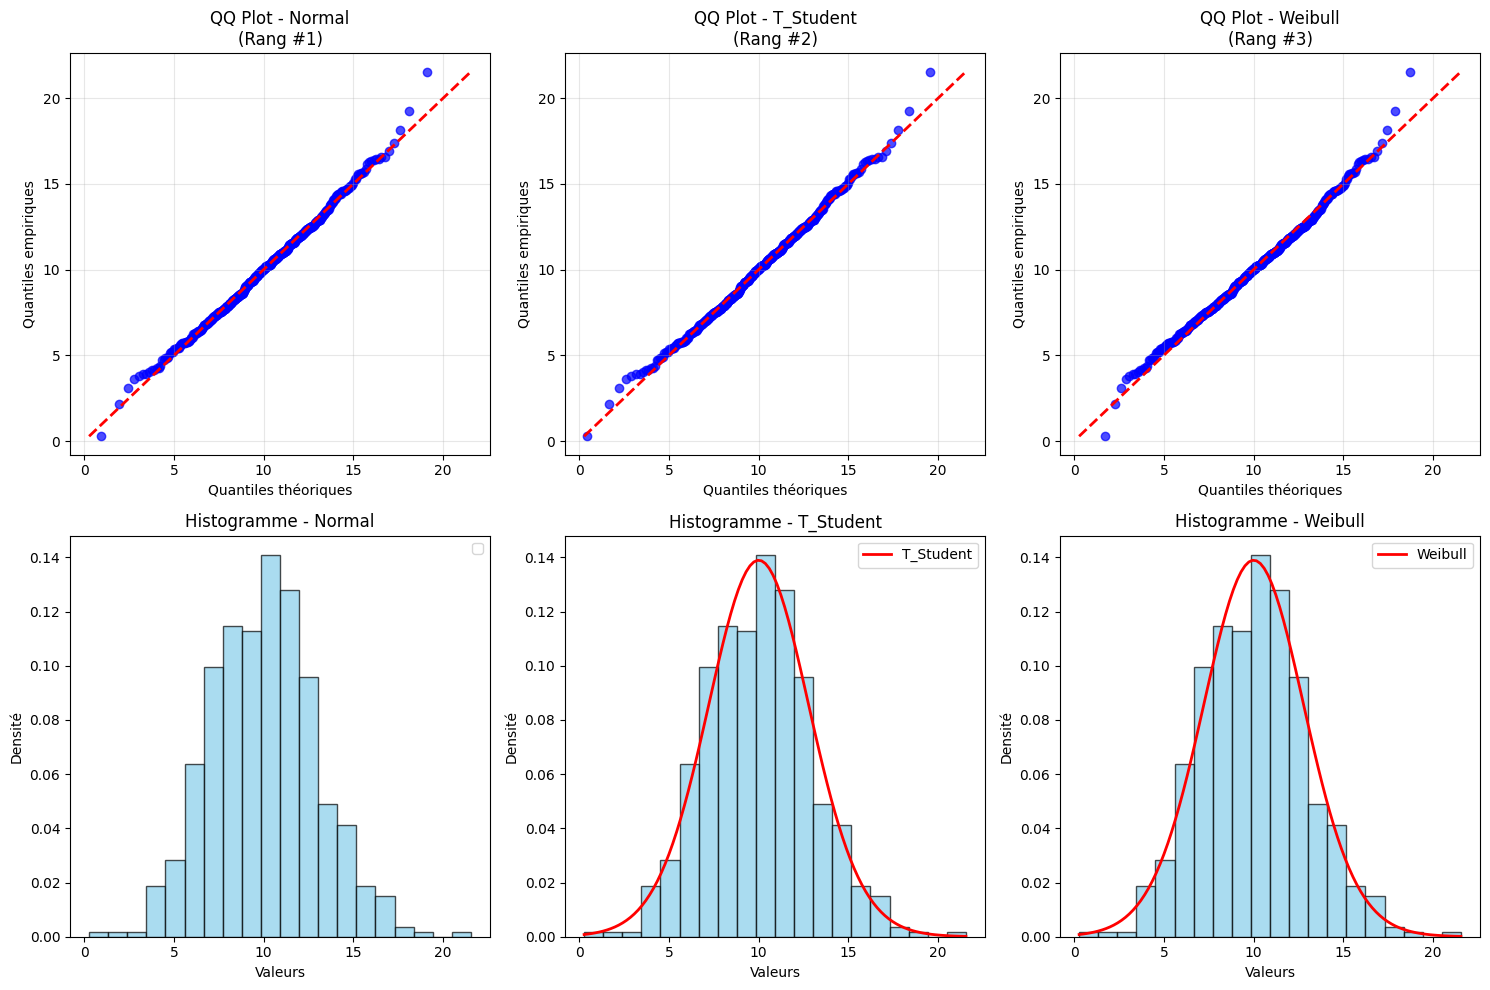

➤ Meilleure distribution: normal
➤ Score AIC: 2501.63



In [9]:
print("🎯 DÉTECTEUR AUTOMATIQUE DE DISTRIBUTION\n")
    
# Test 1: Données vraiment normales
print("TEST 1: Données normales")
data1 = generate_test_data('normal', 500, mu=10, sigma=3)
result1 = detect_best_distribution(data1, criterion='aic', plot_top=3)
print(f"➤ Meilleure distribution: {result1['best_distribution']}")
print(f"➤ Score AIC: {result1['best_score']:.2f}\n")

TEST 2: Données exponentielles
🔍 Test de 10 distributions sur 500 observations...
----------------------------------------------------------------------
✓ normal       | AIC:  2088.76 | Corrélation: 0.9227 | KS p-val: 0.0000
✓ uniform      | AIC:  2296.89 | Corrélation: 0.9018 | KS p-val: 0.0000
✓ exponential  | AIC:  1699.45 | Corrélation: 0.9921 | KS p-val: 0.3150
✓ gamma        | AIC:  1700.63 | Corrélation: 0.9913 | KS p-val: 0.6343
✓ lognormal    | AIC:  1786.25 | Corrélation: 0.8190 | KS p-val: 0.0002
✗ beta         | Erreur: Invalid values in `data`.  Max...
✓ weibull      | AIC:  1701.04 | Corrélation: 0.9909 | KS p-val: 0.5151
✓ pareto       | AIC:  2633.84 | Corrélation: 0.1829 | KS p-val: 0.0000
✓ t_student    | AIC:  2033.61 | Corrélation: 0.8743 | KS p-val: 0.0000
✓ chi2         | AIC:  1700.63 | Corrélation: 0.9913 | KS p-val: 0.6341

🏆 CLASSEMENT (critère: AIC)
 1. exponential  | AIC:  1699.45 | BIC:  1703.66 | Corrélation: 0.9921
 2. gamma        | AIC:  1700.63 | BIC: 

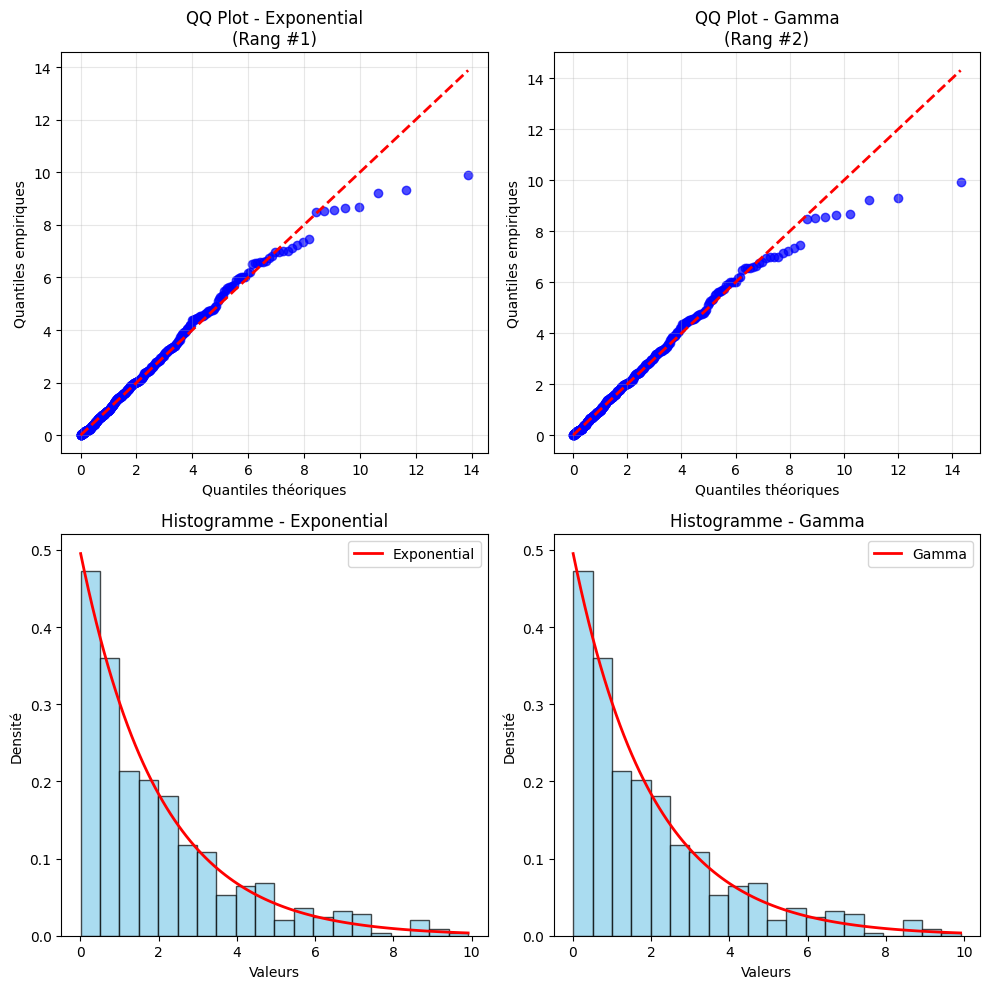

➤ Meilleure distribution: exponential
➤ Score AIC: 1699.45



In [10]:

# Test 2: Données exponentielles
print("TEST 2: Données exponentielles")
data2 = generate_test_data('exponential', 500, scale=2)
result2 = detect_best_distribution(data2, criterion='aic', plot_top=2)
print(f"➤ Meilleure distribution: {result2['best_distribution']}")
print(f"➤ Score AIC: {result2['best_score']:.2f}\n")


TEST 3: Données complexes (mélange de normales)
🔍 Test de 10 distributions sur 500 observations...
----------------------------------------------------------------------
✓ normal       | AIC:  2417.91 | Corrélation: 0.9508 | KS p-val: 0.0000
✓ uniform      | AIC:  2382.66 | Corrélation: 0.9810 | KS p-val: 0.0000
✗ exponential  | Incompatible avec les données
✗ gamma        | Incompatible avec les données
✗ lognormal    | Incompatible avec les données
✗ beta         | Erreur: Invalid values in `data`.  Max...
✗ weibull      | Incompatible avec les données
✗ pareto       | Incompatible avec les données
✓ t_student    | AIC:  2419.91 | Corrélation: 0.9508 | KS p-val: 0.0000
✗ chi2         | Incompatible avec les données

🏆 CLASSEMENT (critère: AIC)
 1. uniform      | AIC:  2382.66 | BIC:  2391.09 | Corrélation: 0.9810
 2. normal       | AIC:  2417.91 | BIC:  2426.34 | Corrélation: 0.9508
 3. t_student    | AIC:  2419.91 | BIC:  2432.55 | Corrélation: 0.9508


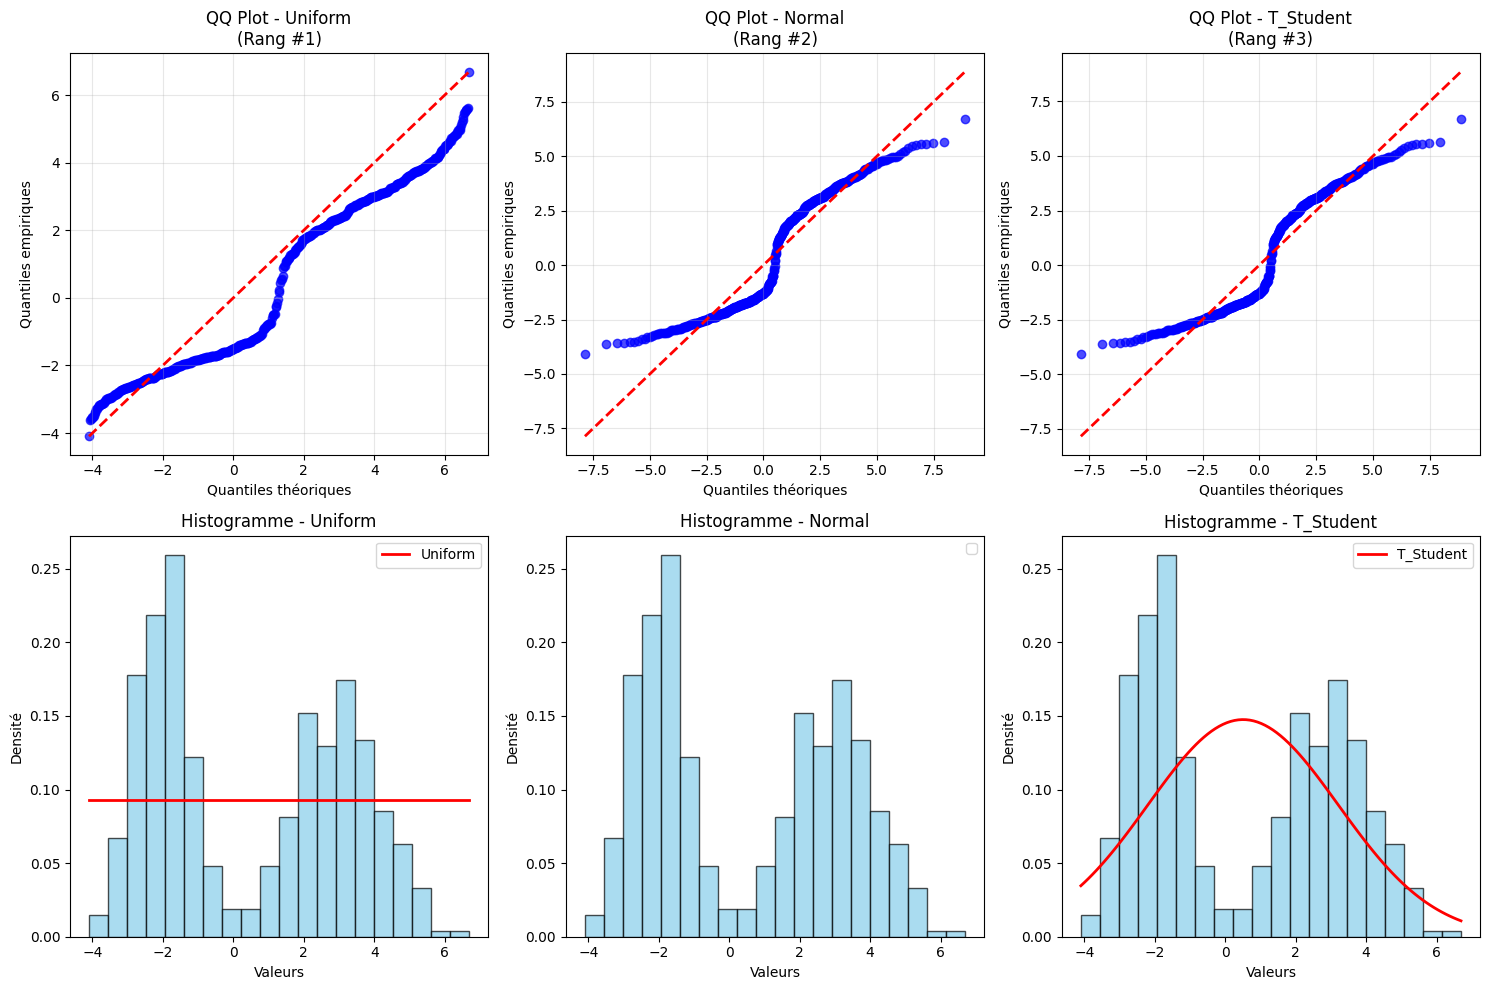

➤ Meilleure distribution: uniform
➤ Score AIC: 2382.66



In [11]:

# Test 3: Données complexes (mélange)
print("TEST 3: Données complexes (mélange de normales)")
data3 = generate_test_data('mixed_normal', 500)
result3 = detect_best_distribution(data3, criterion='aic', plot_top=3)
print(f"➤ Meilleure distribution: {result3['best_distribution']}")
print(f"➤ Score AIC: {result3['best_score']:.2f}\n")

TEST 4: Données t-Student (queues lourdes)
🔍 Test de 10 distributions sur 300 observations...
----------------------------------------------------------------------
✓ normal       | AIC:  1482.40 | Corrélation: 0.9781 | KS p-val: 0.1081
✓ uniform      | AIC:  1834.34 | Corrélation: 0.9187 | KS p-val: 0.0000
✗ exponential  | Incompatible avec les données
✗ gamma        | Incompatible avec les données
✗ lognormal    | Incompatible avec les données
✗ beta         | Erreur: Invalid values in `data`.  Max...
✗ weibull      | Incompatible avec les données
✗ pareto       | Incompatible avec les données
✓ t_student    | AIC:  1446.55 | Corrélation: 0.9893 | KS p-val: 0.9466
✗ chi2         | Incompatible avec les données

🏆 CLASSEMENT (critère: AIC)
 1. t_student    | AIC:  1446.55 | BIC:  1457.66 | Corrélation: 0.9893
 2. normal       | AIC:  1482.40 | BIC:  1489.81 | Corrélation: 0.9781
 3. uniform      | AIC:  1834.34 | BIC:  1841.74 | Corrélation: 0.9187


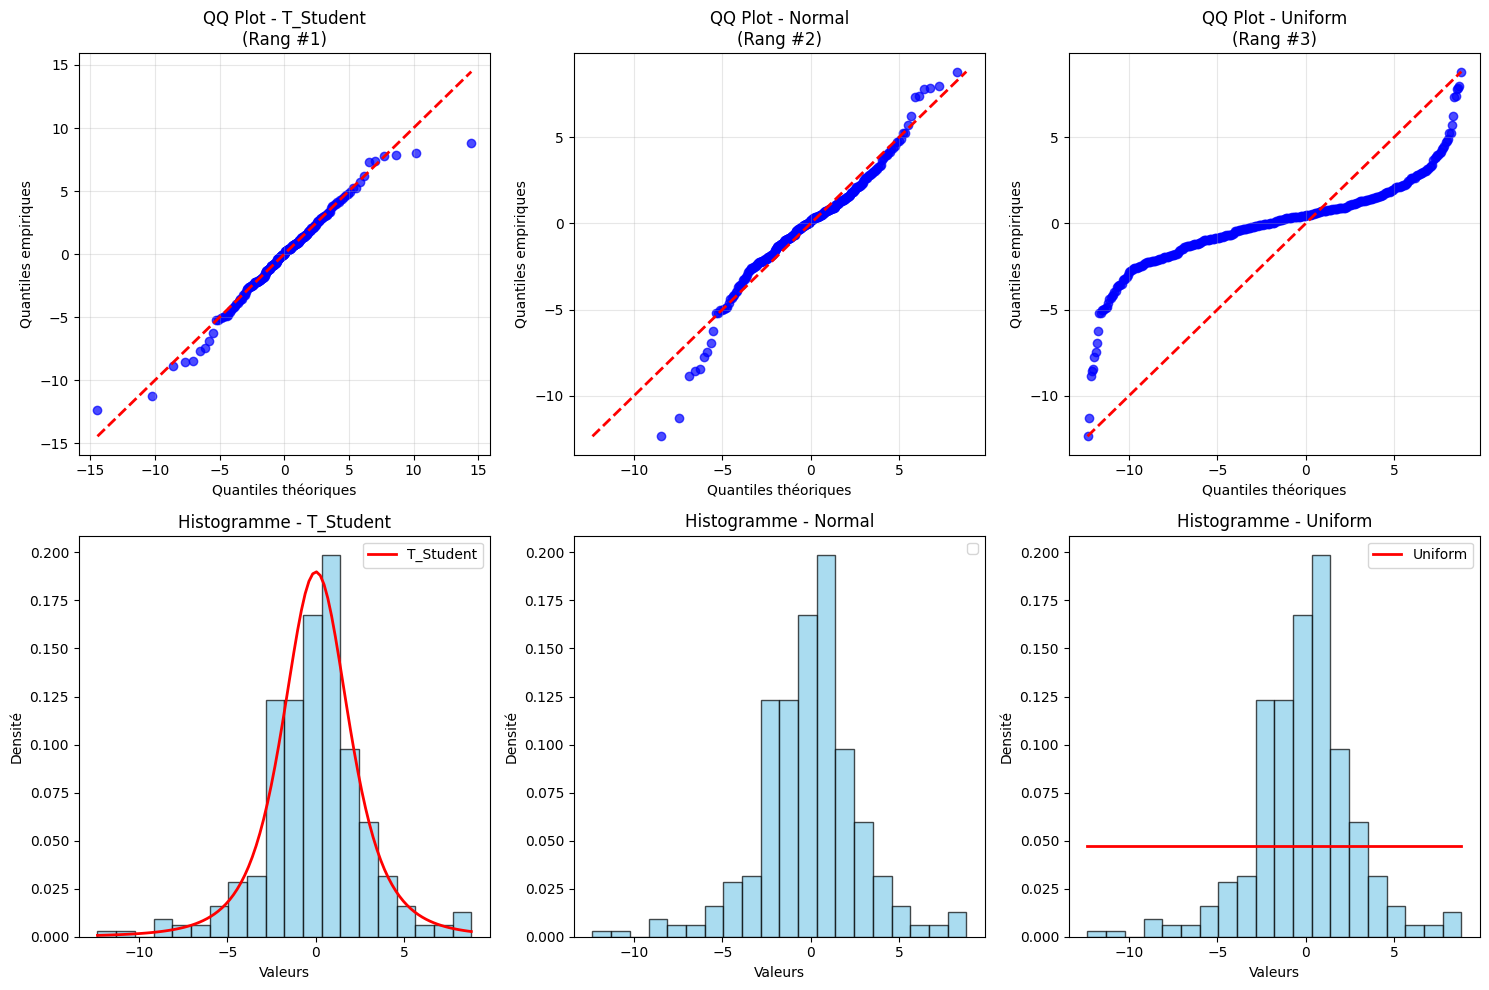

➤ Meilleure distribution: t_student
➤ Score AIC: 1446.55
➤ Paramètres estimés: {'df': np.float64(3.3846959073798963), 'loc': np.float64(0.012196935958688662), 'scale': np.float64(1.9529036658212715)}


In [12]:

# Test 4: Données t-Student
print("TEST 4: Données t-Student (queues lourdes)")
data4 = generate_test_data('t_student', 300, df=3, scale=2)
result4 = detect_best_distribution(data4, criterion='aic', plot_top=3)
print(f"➤ Meilleure distribution: {result4['best_distribution']}")
print(f"➤ Score AIC: {result4['best_score']:.2f}")
print(f"➤ Paramètres estimés: {result4['best_params']}")